Unsupervised Fraud Detection: Isolation Forest

In [1]:
##All General Import Statements 
import pandas as pd 
import numpy as np
import math 
import random 
%matplotlib inline 
import random 
from matplotlib import pyplot 


In [2]:
# Load your dataset here
from google.colab import files
uploaded = files.upload()
print ('Data read into a pandas dataframe!')

Saving creditcard.csv to creditcard.csv
Data read into a pandas dataframe!


In [3]:
import warnings
warnings.filterwarnings("ignore")

import os
df = pd.read_csv('creditcard.csv')
df.head()


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [18]:
y_true=df['Class']
df_data=df.drop('Class',1)

Anomaly Detection Algorithms: Isolation Forest vs the Rest

The below code defines classes for external and internal nodes

In [4]:
class ExNode:
    def __init__(self,size):
        self.size=size
        
class InNode:
    def __init__(self,left,right,splitAtt,splitVal):
        self.left=left
        self.right=right
        self.splitAtt=splitAtt
        self.splitVal=splitVal

Forest

In [5]:
def iForest(X,noOfTrees,sampleSize):
    forest=[]
    hlim=math.ceil(math.log(sampleSize,2))
    for i in range(noOfTrees):
        X_train=X.sample(sampleSize)
        forest.append(iTree(X_train,0,hlim))
    return forest

Isolation Tree

In [6]:
def iTree(X,currHeight,hlim):
    if currHeight>=hlim or len(X)<=1:
        return ExNode(len(X))
    else:
        Q=X.columns
        q=random.choice(Q)
        p=random.choice(X[q].unique())
        X_l=X[X[q]<p]
        X_r=X[X[q]>=p]
        return InNode(iTree(X_l,currHeight+1,hlim),iTree(X_r,currHeight+1,hlim),q,p)

Path Length

In [7]:
def pathLength(x,Tree,currHeight):
    if isinstance(Tree,ExNode):
        return currHeight
    a=Tree.splitAtt
    if x[a]<Tree.splitVal:
        return pathLength(x,Tree.left,currHeight+1)
    else:
        return pathLength(x,Tree.right,currHeight+1)

TEST RUN

In [10]:
#df=pd.read_csv("../input/creditcard.csv")
#y_true=df['Class']
#df_data=df.drop('Class',1)
import warnings
warnings.filterwarnings("ignore")

import os
df_data = pd.read_csv('creditcard.csv')
df_data.head()


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


Next, we create the forest.

In [23]:
sampleSize=10000
ifor=iForest(df_data.sample(100000),10,sampleSize) ##Forest of 10 trees

Next, we select 1000 random datapoints and get their path lengths. The purpose for this is to plot and see if anomalies actually have shorter path lengths.

In [24]:
#from pandas.core.tools.numeric import to_numeric
posLenLst=[]
negLenLst=[]

for sim in range(1000):
    ind=random.choice(df_data[y_true==1].index)
    for tree in ifor:
        posLenLst.append(pathLength(df_data.iloc[ind],tree,0))
        
    ind=random.choice(df_data[y_true==0].index)
    for tree in ifor:
        negLenLst.append(pathLength(df_data.iloc[ind],tree,0))

Finally, we plot the path lengths.

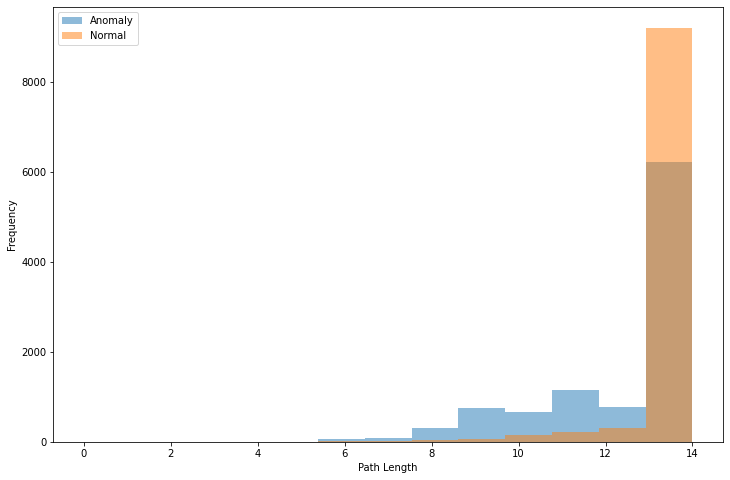

In [25]:
bins = np.linspace(0,math.ceil(math.log(sampleSize,2)), math.ceil(math.log(sampleSize,2)))

pyplot.figure(figsize=(12,8))
pyplot.hist(posLenLst, bins, alpha=0.5, label='Anomaly')
pyplot.hist(negLenLst, bins, alpha=0.5, label='Normal')
pyplot.xlabel('Path Length')
pyplot.ylabel('Frequency')
pyplot.legend(loc='upper left')

Anomalies do seem to have a lower path length. Not bad for random division!

Notes:
The above implementation ignores three aspects of the actual algorithm fo the sake of simplicity.

The average depth needs to be added to the depth once the current length hits the height limit
The path lengths are not normalized between trees and hence the actual values are used for plotting
The authors of the paper suggest using kurtosis to select features as a refinement over random selection
Plotting the Data
Using a technique called T-SNE, we can reduce the dimensions of the data and create a 2D plot. The objective here is to show that distance based anomaly detection methods might not work as well as other techniques on this dataset. This is because the positive cases are not too far away from the normal cases.

In [26]:
from sklearn.manifold import TSNE

In [27]:
df_plt=df[df['Class']==0].sample(1000)
df_plt_pos=df[df['Class']==1].sample(20)
df_plt=pd.concat([df_plt,df_plt_pos])
y_plt=df_plt['Class']
X_plt=df_plt.drop('Class',1)

In [28]:
X_embedded = TSNE(n_components=2).fit_transform(X_plt)

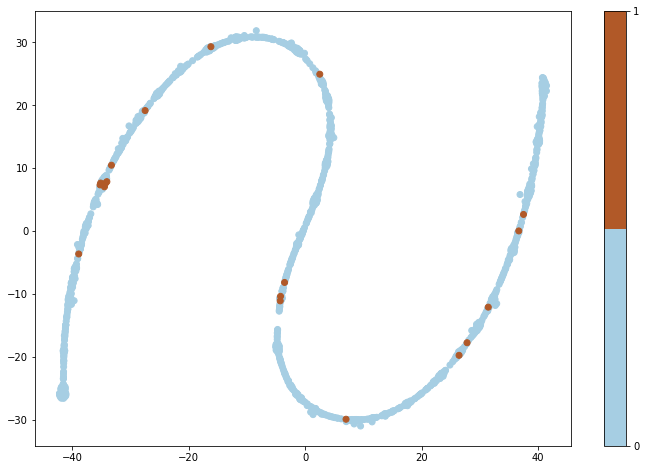

In [29]:
pyplot.figure(figsize=(12,8))
pyplot.scatter(X_embedded[:,0], X_embedded[:,1], c=y_plt, cmap=pyplot.cm.get_cmap("Paired", 2))
pyplot.colorbar(ticks=range(2))

Time for the Real Fight!
To keep things even, all of the algorithms are run with their default parameters.

Let's start by importing the scikit-learn implementations of all 4 algorithms.

In [30]:
from sklearn.ensemble import IsolationForest
from sklearn.svm import OneClassSVM
from sklearn.neighbors import LocalOutlierFactor ## Only available with scikit-learn 0.19 and later
from sklearn.cluster import KMeans

Next, let's create a train and test dataset.

In [31]:
from sklearn.model_selection import train_test_split

In [32]:
X_train, X_test, y_train, y_test = train_test_split(df_data, y_true, test_size=0.3, random_state=42)

Finally, let's create a few helper functions that help with training and testing the models. The preprocess function is not used in this notebook but it might help improve the scores on the KMeans and One Class SVM models.

In [33]:
## Not required for Isolation Forest
def preprocess(df_data):
    for col in df_data:
        df_data[col]=(df_data[col]-np.min(df_data[col]))/(np.max(df_data[col])-np.min(df_data[col]))
    return

**Note:** The below train and predict functions are designed to output ensemble models (bagged models), with the default size being 5 models. The Isolation Forest and One Class SVM use these functions.

In [34]:
## Not valid for LOF
def train(X,clf,ensembleSize=5,sampleSize=10000):
    mdlLst=[]
    for n in range(ensembleSize):
        X=df_data.sample(sampleSize)
        clf.fit(X)
        mdlLst.append(clf)
    return mdlLst

In [35]:
## Not valif for LOF
def predict(X,mdlLst):
    y_pred=np.zeros(X.shape[0])
    for clf in mdlLst:
        y_pred=np.add(y_pred,clf.decision_function(X).reshape(X.shape[0],))
    y_pred=(y_pred*1.0)/len(mdlLst)
    return y_pred

Finally, let's import some model scoring libraries. Since, we are dealing with a heavily imbalanced dataset, F1 Score is used as a proxy for model performance.

For more details, refer http://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html

In [36]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix,f1_score

Isolation Forest

In [55]:
alg=IsolationForest(n_estimators=100, max_samples="auto", contamination=0.01, max_features=1.0, bootstrap=False, n_jobs=-1, random_state=42, verbose=0)

Note: The magic function timeit does not let us use any variable that is created in the timeit cell. Hence, every cell with a timeit magic function will have a corresponding regular cell with the same code.

In [52]:
%%timeit
if_mdlLst=train(X_train,alg)

3.69 s ± 339 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [56]:
if_mdlLst=train(X_train,alg)

In [57]:
%%timeit
if_y_pred=predict(X_test,if_mdlLst)
if_y_pred=1-if_y_pred

#Creating class labels based on decision function
if_y_pred_class=if_y_pred.copy()
if_y_pred_class[if_y_pred>=np.percentile(if_y_pred,95)]=1
if_y_pred_class[if_y_pred<np.percentile(if_y_pred,95)]=0

17.2 s ± 540 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [58]:
if_y_pred=predict(X_test,if_mdlLst)
if_y_pred=1-if_y_pred

#Creating class labels based on decision function
if_y_pred_class=if_y_pred.copy()
if_y_pred_class[if_y_pred>=np.percentile(if_y_pred,95)]=1
if_y_pred_class[if_y_pred<np.percentile(if_y_pred,95)]=0

In [59]:
roc_auc_score(y_test, if_y_pred_class)

0.9094703110357815

In [60]:
f1_score(y_test, if_y_pred_class)

0.0535268768428215

In [61]:
if_cm=confusion_matrix(y_test, if_y_pred_class)

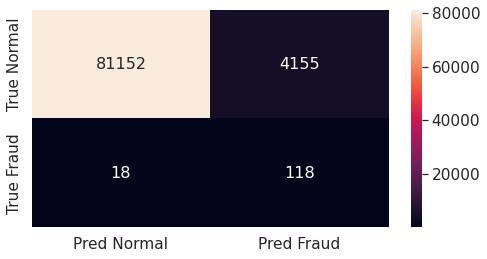

In [62]:
import seaborn as sn
     
df_cm = pd.DataFrame(if_cm,
                  ['True Normal','True Fraud'],['Pred Normal','Pred Fraud'])
pyplot.figure(figsize = (8,4))
sn.set(font_scale=1.4)#for label size
sn.heatmap(df_cm, annot=True,annot_kws={"size": 16},fmt='g')# font size

KMeans
The top 5% of the farthest point from cluster centers are itentified as fraud (outliers)

In [68]:
import timeit
#timeit

kmeans = KMeans(n_clusters=8, random_state=42).fit(X_train)

In [70]:
kmeans = KMeans(n_clusters=8, random_state=42).fit(X_train)

In [71]:
%%timeit
X_test_clusters=kmeans.predict(X_test)
X_test_clusters_centers=kmeans.cluster_centers_
dist = [np.linalg.norm(x-y) for x,y in zip(X_test.values,X_test_clusters_centers[X_test_clusters])]

km_y_pred=np.array(dist)
km_y_pred[dist>=np.percentile(dist,95)]=1
km_y_pred[dist<np.percentile(dist,95)]=0

608 ms ± 42.6 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [72]:
X_test_clusters=kmeans.predict(X_test)
X_test_clusters_centers=kmeans.cluster_centers_
dist = [np.linalg.norm(x-y) for x,y in zip(X_test.values,X_test_clusters_centers[X_test_clusters])]

km_y_pred=np.array(dist)
km_y_pred[dist>=np.percentile(dist,95)]=1
km_y_pred[dist<np.percentile(dist,95)]=0

In [73]:
roc_auc_score(y_test, km_y_pred)

0.5265078067519458

In [74]:
f1_score(y_test, km_y_pred)

0.0063506464050805175

In [76]:
km_cm=confusion_matrix(y_test, km_y_pred)

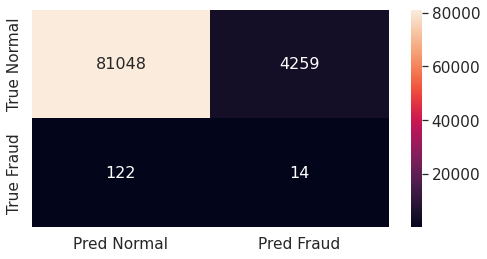

In [77]:
df_cm = pd.DataFrame(km_cm,
                  ['True Normal','True Fraud'],['Pred Normal','Pred Fraud'])
pyplot.figure(figsize = (8,4))
sn.set(font_scale=1.4)#for label size
sn.heatmap(df_cm, annot=True,annot_kws={"size": 16},fmt='g')# font size

LOF

Local Outlier Factor only looks at the local neighbourhood of a data point and hence cannot make predictions on out of sample data points. Hence we work directly with X_test here.

In [78]:
clf=LocalOutlierFactor(n_neighbors=20, algorithm='auto', leaf_size=30, \
                   metric='minkowski', p=2, metric_params=None, contamination=0.1, n_jobs=-1)

In [79]:
%%timeit
clf.fit(X_test)

3min 9s ± 15.2 s per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [80]:
clf.fit(X_test)

LocalOutlierFactor(contamination=0.1, n_jobs=-1)

In [81]:
%%timeit
lof_y_pred=clf.negative_outlier_factor_

#Creating class labels based on decision function
lof_y_pred_class=lof_y_pred.copy()
lof_y_pred_class[lof_y_pred>=np.percentile(lof_y_pred,95)]=1
lof_y_pred_class[lof_y_pred<np.percentile(lof_y_pred,95)]=0

3.6 ms ± 42.5 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [82]:
lof_y_pred=clf.negative_outlier_factor_

#Creating class labels based on decision function
lof_y_pred_class=lof_y_pred.copy()
lof_y_pred_class[lof_y_pred>=np.percentile(lof_y_pred,95)]=1
lof_y_pred_class[lof_y_pred<np.percentile(lof_y_pred,95)]=0

In [83]:
roc_auc_score(y_test, lof_y_pred_class)

0.4970491525762661

In [84]:
f1_score(y_test, lof_y_pred_class)

0.0027217056021773644

In [85]:
lof_cm=confusion_matrix(y_test, lof_y_pred_class)

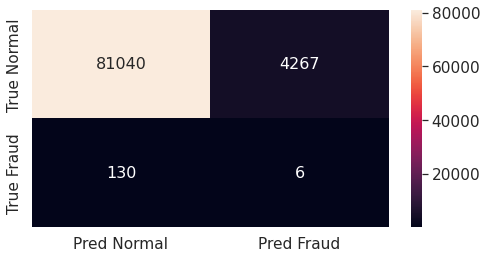

In [86]:
df_cm = pd.DataFrame(lof_cm,
                  ['True Normal','True Fraud'],['Pred Normal','Pred Fraud'])
pyplot.figure(figsize = (8,4))
sn.set(font_scale=1.4)#for label size
sn.heatmap(df_cm, annot=True,annot_kws={"size": 16},fmt='g')# font size

One-Class SVM*

*Any kernel except linear will take a while. Feel free to grab a coffee, if you decide to change the kernel type

In [87]:
alg=OneClassSVM(kernel='linear',gamma='auto', coef0=0.0, tol=0.001, nu=0.5, \
                shrinking=True, cache_size=500, verbose=False, max_iter=-1)

In [88]:
%%timeit
osvm_mdlLst=train(X_train,alg)

19.7 s ± 56.3 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [89]:
osvm_mdlLst=train(X_train,alg)

In [90]:
%%timeit
osvm_y_pred=predict(X_test,osvm_mdlLst)

#Creating class labels based on decision function
osvm_y_pred_class=osvm_y_pred.copy()
osvm_y_pred_class[osvm_y_pred<0]=1
osvm_y_pred_class[osvm_y_pred>=0]=0

1min 21s ± 38.1 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [91]:
osvm_y_pred=predict(X_test,osvm_mdlLst)

#Creating class labels based on decision function
osvm_y_pred_class=osvm_y_pred.copy()
osvm_y_pred_class[osvm_y_pred<0]=1
osvm_y_pred_class[osvm_y_pred>=0]=0

In [92]:
roc_auc_score(y_test, osvm_y_pred_class)

0.5152758393732256

In [93]:
f1_score(y_test, osvm_y_pred_class)

0.003370039870894247

In [94]:
osvm_cm=confusion_matrix(y_test, osvm_y_pred_class)

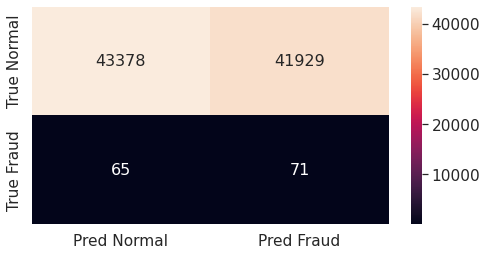

In [95]:
df_cm = pd.DataFrame(osvm_cm,
                  ['True Normal','True Fraud'],['Pred Normal','Pred Fraud'])
pyplot.figure(figsize = (8,4))
sn.set(font_scale=1.4)#for label size
sn.heatmap(df_cm, annot=True,annot_kws={"size": 16},fmt='g')# font size

Conclusion

In [96]:
## Performance Plot
train_times={
    'Isolation Forest': 4.38,
    'KMeans':20.9,
    'LOF':2.06,
    'OneClass SVM': 21.4
}

prediction_times={
    'Isolation Forest':34.2,
    'KMeans':0.052,
    'LOF':0.00368,
    'OneClass SVM': 71
}

Text(0.5, 0, 'Time in seconds')

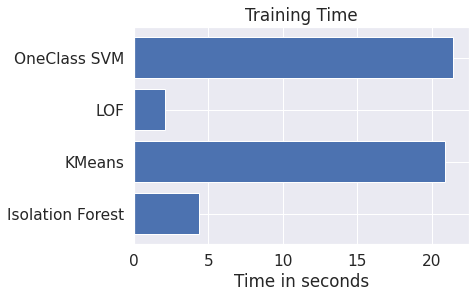

In [97]:
pyplot.title('Training Time')
pyplot.barh(range(len(train_times)), list(train_times.values()), align='center')
pyplot.yticks(range(len(train_times)), list(train_times.keys()))
pyplot.xlabel('Time in seconds')

Isolation forest has the 2nd fastest training time. This is very impressive considering that our model is actually an ensemble of 5 Isolation forest models

Text(0.5, 0, 'Time in seconds')

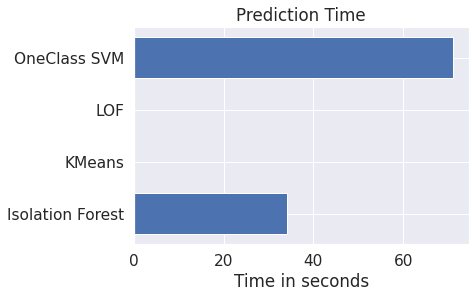

In [98]:
pyplot.title('Prediction Time')
pyplot.barh(range(len(prediction_times)), list(prediction_times.values()), align='center')
pyplot.yticks(range(len(prediction_times)), list(prediction_times.keys()))
pyplot.xlabel('Time in seconds')

The algorithm doesn't fare so well but this might be due to the over head of the ensemble structure.

In [99]:
## Performance Plot
auc_scores={
    'Isolation Forest': roc_auc_score(y_test, if_y_pred_class),
    'KMeans':roc_auc_score(y_test, km_y_pred),
    'LOF':roc_auc_score(y_test, lof_y_pred_class),
    'OneClass SVM': roc_auc_score(y_test, osvm_y_pred_class)
}

f1_scores={
    'Isolation Forest':f1_score(y_test, if_y_pred_class),
    'KMeans':f1_score(y_test, km_y_pred),
    'LOF':f1_score(y_test, lof_y_pred_class),
    'OneClass SVM': f1_score(y_test, osvm_y_pred_class)
}

Text(0.5, 0, 'AUC Score')

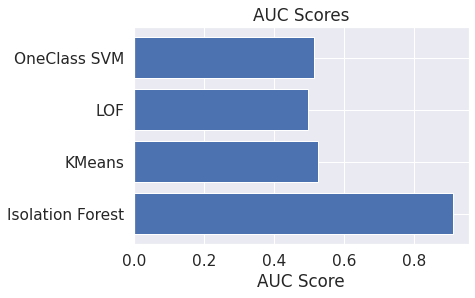

In [100]:
pyplot.title('AUC Scores')
pyplot.barh(range(len(auc_scores)), list(auc_scores.values()), align='center')
pyplot.yticks(range(len(auc_scores)), list(auc_scores.keys()))
pyplot.xlabel('AUC Score')

Text(0.5, 0, 'F1 Score')

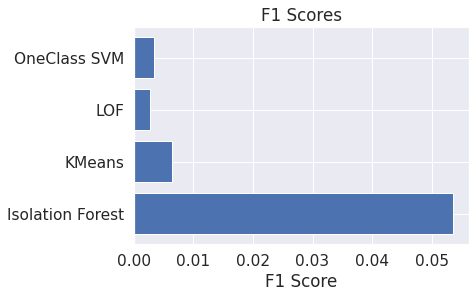

In [101]:
pyplot.title('F1 Scores')
pyplot.barh(range(len(f1_scores)), list(f1_scores.values()), align='center')
pyplot.yticks(range(len(f1_scores)), list(f1_scores.keys()))
pyplot.xlabel('F1 Score')